Below is a Personal Finance Tracker project.The user will record their expenses and income and will bes tored in a CSV file and generate summarises of their total income total expenses and balance.The program will also allow users to view reportssuch as monthly expenses by category.

In [167]:
import streamlit as st
import csv
from datetime import datetime

#creating the file finance data csv

FILE_NAME = "finance_data.csv"

def init_file():
    try:
        with open(FILE_NAME, "x", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(["Date", "Type", "Category/Source", "Amount"])
    except FileExistsError:
        pass  # File already exists, do nothing
# Call the function to actually create the file
init_file()

In [168]:
# Add a new record
def add_record(record_type, category, amount):
    date = datetime.now().strftime("%Y-%m-%d")
    with open("finance_data.csv", "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([date, record_type, category, amount])
   
print("Figures recorded!")

#This function takes three things ie (record_type, category, amount), adds today’s date automatically, and saves them as a new row in my finance data CSV file.

Figures recorded!


In [169]:
#add_record("Income","Techwriting",120000)
#add_record("Income","Salary",115000)
#add_record("Expense","Rent",40000)
#add_record("Expense","Food and entertainment",45000)
#add_record("Expense","transport",25000)
#add_record("Expense","MMFacc",20000)



In [170]:
# Summary 
def show_summary():
    """Show total income, total expenses, and balance."""
    total_income, total_expense = 0, 0
    with open("finance_data.csv", "r") as file:
        reader = csv.reader(file)
        next(reader)  # skip header
        for row in reader:
            if not row: 
                continue
            if row[1] == "Income":
                total_income += float(row[3])
            elif row[1] == "Expense":
                total_expense += float(row[3])

    balance = total_income - total_expense
    print("\n--- Summary ---")
    print(f"Total Income:  {total_income}")
    print(f"Total Expense: {total_expense}")
    print(f"Balance:       {balance}")

    return total_income,total_expense,balance

In [171]:
total_income,total_expense,balance=show_summary()
save_summary_txt(total_income,total_expense,balance)


--- Summary ---
Total Income:  235000.0
Total Expense: 130000.0
Balance:       105000.0
Summary saved as summary.txt


In [172]:
##Create a pie chart to visually summarize the above

In [173]:
import matplotlib.pyplot as plt

def create_pie_chart(total_income, total_expense):
    values = [total_income, total_expense]
    labels = ["Income", "Expenses"]

    plt.pie(values, labels=labels, autopct="%1.1f%%")
    plt.title("Income vs Expenses")

    plt.savefig("finance_pie_chart.png")  # save first
    plt.show()  # then display
    plt.close()
    print("Pie chart saved as finance_pie_chart.png")



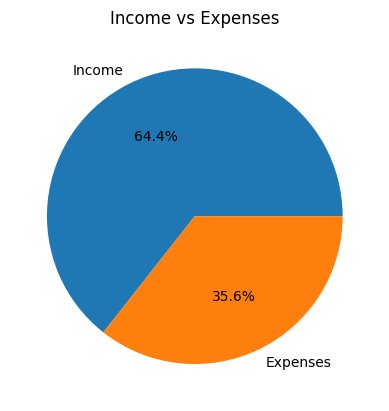

Pie chart saved as finance_pie_chart.png


In [174]:
create_pie_chart(235000, 130000)